# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

pd.options.display.max_columns = None

In [25]:
_x_train = pd.read_csv('./DataSet/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [26]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

# Clasificacion

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado(ESTA EN PREPROCESAMIENTO)
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad (ESTA EN PREPROCESAMIENTO)
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [27]:
df_discret = pd.DataFrame(data=y_train['0'].array, columns=['pxm2'])

### Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.

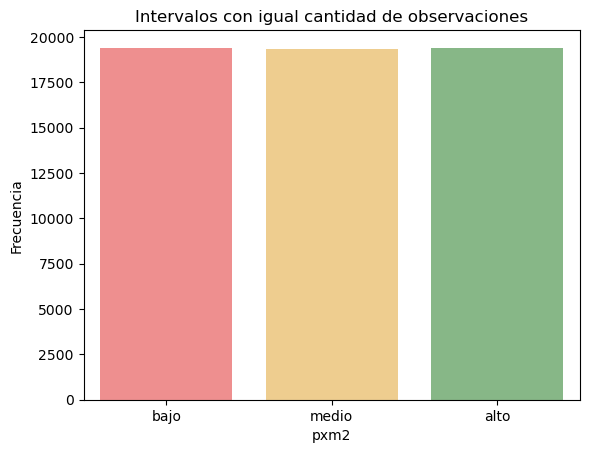

In [28]:
plt.figure(dpi=100)
labels=["bajo","medio","alto"]

df_discret["pxm2_discret_igual_frec"]=pd.qcut(df_discret["pxm2"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_pxm2=df_discret.groupby(['pxm2_discret_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_pxm2.index.tolist()    ## Declaramos valores para el eje x
eje_y = ds_agrupado_pxm2['pxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_pxm2 ,alpha=0.5, palette=['red','orange','green']).set(title="Intervalos con igual cantidad de observaciones",ylabel='Frecuencia',xlabel='pxm2')
plt.show()

### Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones, el siguiente con el 50% y el último con el 25% de las observaciones restantes.

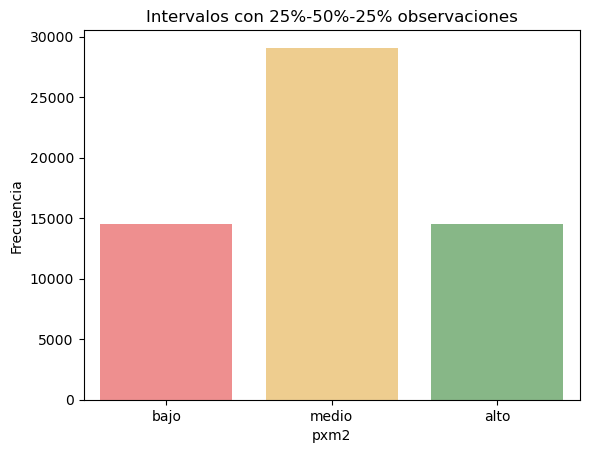

In [29]:
plt.figure(dpi=100)
labels=["bajo","medio","alto"]

df_discret["pxm2_discret_igual_frec"]=pd.qcut(df_discret["pxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_pxm2=df_discret.groupby(['pxm2_discret_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_pxm2.index.tolist()    ## Declaramos valores para el eje x
eje_y = ds_agrupado_pxm2['pxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_pxm2 ,alpha=0.5,palette=['red','orange','green']).set(title="Intervalos con 25%-50%-25% observaciones",ylabel='Frecuencia',xlabel='pxm2')
plt.show()

### Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones, el siguiente con el 50% y el último con el 25% de las observaciones restantes.

In [30]:
df_pxm2 = x_train.copy()
df_pxm2['Casa'] = df_pxm2['Departamento'] + df_pxm2['PH']
df_pxm2.Casa.replace(({float(1): 0, float(0): 1, float(2): 0}), inplace=True)

In [31]:
#Recreo la variable tipo para poder graficar
tipo = []
for index, row in df_pxm2.iterrows():
    if(row['PH']): tipo.append('PH')
    if(row['Casa']): tipo.append('Casa')
    if(row['Departamento']): tipo.append('Departamento')
df_pxm2['tipo'] = tipo

In [32]:
#Recreo la variable pxm2 para visualizarla
df_pxm2['pxm2'] = y_train

In [33]:
# Tipo de propiedad
df_depto = df_pxm2.copy()
idx_depto = df_depto[df_depto.tipo.apply(lambda t: t != "Departamento")].index
df_depto.drop(idx_depto, inplace=True)
df_depto.reset_index(drop=True, inplace=True)
df_discret_depto=df_depto.loc[:,'pxm2'].to_frame()

df_ph = df_pxm2.copy()
idx_ph = df_ph[df_ph.tipo.apply(lambda t: t != "PH")].index
df_ph.drop(idx_ph, inplace=True)
df_ph.reset_index(drop=True, inplace=True)
df_discret_ph=df_ph.loc[:,'pxm2'].to_frame()

df_casa = df_pxm2.copy()
idx_casa = df_casa[df_casa.tipo.apply(lambda t: t != "Casa")].index
df_casa.drop(idx_casa, inplace=True)
df_casa.reset_index(drop=True, inplace=True)
df_discret_casa=df_casa.loc[:,'pxm2'].to_frame()

Text(0.5, 1.0, 'Casa')

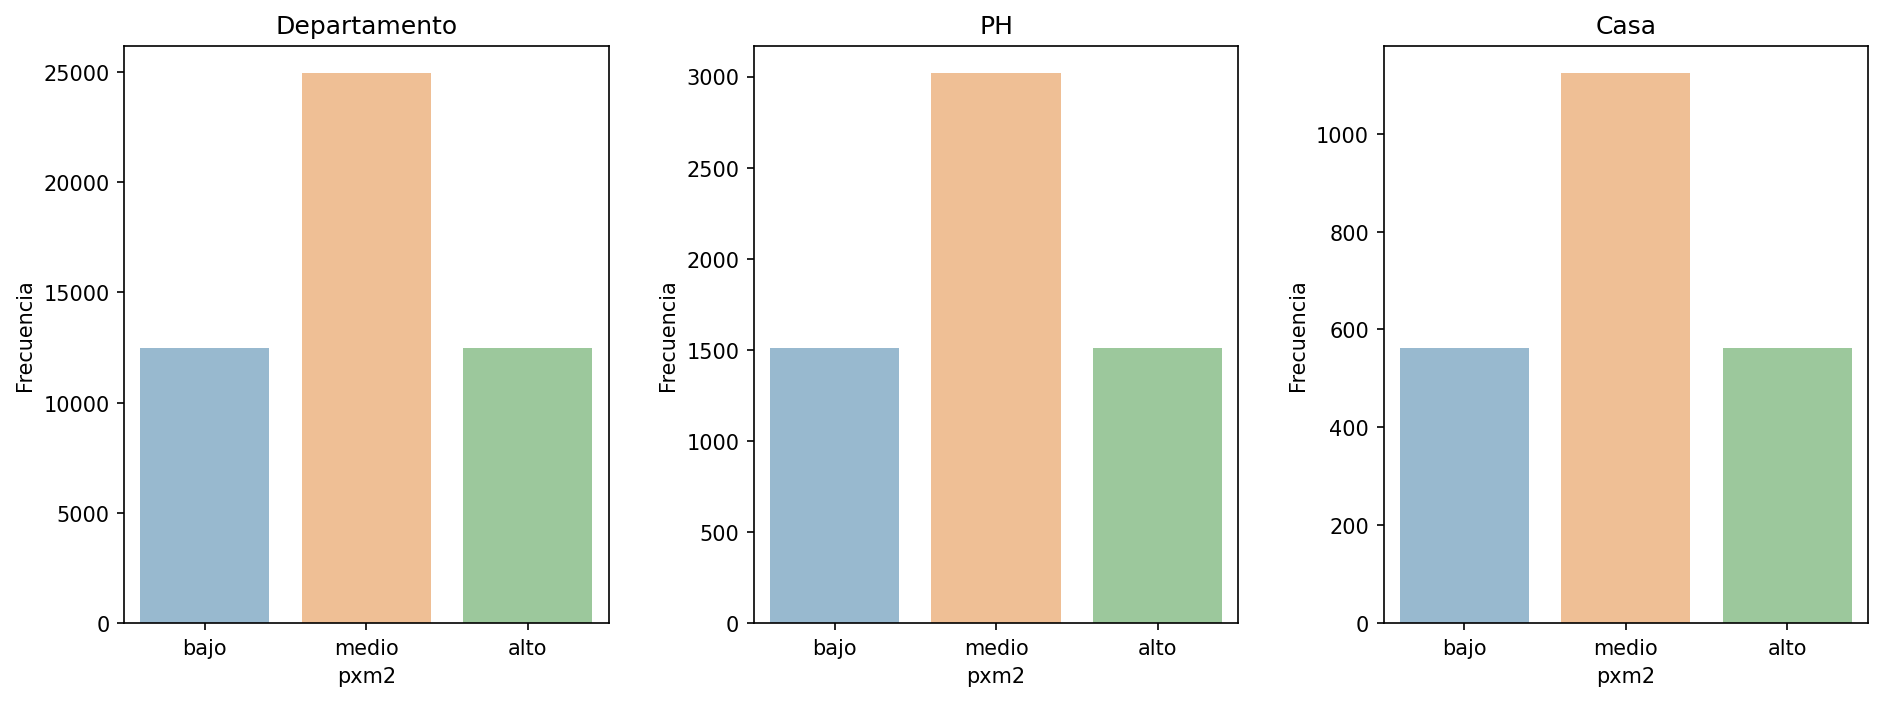

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150, figsize=(15, 5))

labels=["bajo","medio","alto"]

df_discret_depto["pxm2_discret_igual_frec"]=pd.qcut(df_discret_depto["pxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_agrupado0=df_discret_depto.groupby(['pxm2_discret_igual_frec']).count()
eje_x0 = ds_agrupado0.index.tolist()
eje_y0 = ds_agrupado0['pxm2'].tolist()
sns.barplot(x=eje_x0, y=eje_y0, data=ds_agrupado0 ,alpha=0.5,ax=axes[0]).set(ylabel='Frecuencia',xlabel='pxm2')

df_ph["pxm2_discret_igual_frec"]=pd.qcut(df_ph["pxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_agrupado1=df_ph.groupby(['pxm2_discret_igual_frec']).count()
eje_x1 = ds_agrupado1.index.tolist()
eje_y1 = ds_agrupado1['pxm2'].tolist()
sns.barplot(x=eje_x1, y=eje_y1, data=ds_agrupado1 ,alpha=0.5,ax=axes[1]).set(ylabel='Frecuencia',xlabel='pxm2')

df_casa["pxm2_discret_igual_frec"]=pd.qcut(df_casa["pxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_agrupado2=df_casa.groupby(['pxm2_discret_igual_frec']).count()
eje_x2 = ds_agrupado2.index.tolist()
eje_y2 = ds_agrupado2['pxm2'].tolist()
sns.barplot(x=eje_x2, y=eje_y2, data=ds_agrupado2 ,alpha=0.5,ax=axes[2]).set(ylabel='Frecuencia',xlabel='pxm2')


plt.subplots_adjust(wspace=0.3)
axes[0].set_title("Departamento")
axes[1].set_title("PH")
axes[2].set_title("Casa")

## Conclusion
Elegimos la 2da opcion porque es comun en el dia a dia ver mas propiedades con el costo medio que alto o bajo. Es algo que mas se ve en nuestra realidad.

In [35]:
_x_train = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_train.rename(columns={'0':'pxm2'}, inplace=True)
_y_test.rename(columns={'0':'pxm2'}, inplace=True)

In [36]:
#Ejecutare mis modelos con una copia
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

Clasifico mi target respecto a la 2da opcion

In [37]:
labels=["bajo","medio","alto"]
new_target_train, bins = pd.qcut(y_train['pxm2'],q=[0,0.25,0.75,1], labels=labels, retbins=True)

Reflejo la clasificacion en el test

In [38]:
bins[0] = min(y_test['pxm2']) - 1
bins[3] = max(y_test['pxm2']) + 1

In [39]:
new_target_test = pd.cut(y_test['pxm2'], bins=bins, labels=labels, include_lowest=True)

In [40]:
y_train = new_target_train
y_test = new_target_test

**b) Entrenamiento y Predicción**
​
Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**
​

In [41]:
#Ya lo hemos hecho en los pasos anteriores

**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [42]:
#usar x_train, y_train, x_test, y_test

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
#usar x_train, y_train, x_test, y_test

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [ ]:
#usar x_train, y_train, x_test, y_test

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R: